# Star Wars Survey Project

In this project, the objective is to analyze a dataset on a survey conducted about the star wars franchise.

In [1]:
# Basic setup
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
star_wars = pd.read_csv('star_wars.csv', encoding = 'ISO-8859-1')

In [2]:
# print(star_wars.head(10))
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
# exclude columns with a null value in the RespondentID column
print(star_wars.shape)
star_wars = star_wars.loc[star_wars['RespondentID'].notnull()]
print(star_wars.shape)

(1187, 38)
(1186, 38)


One Coulumn was excluded

In [4]:
print(star_wars.iloc[:,2].isnull().sum())

350


The next objective is to clean the data in the columns of the first two questions in the following way:
'Yes' --> True
'No'  --> False
NaN   --> NaN

The first question does not have any nan values.
The second has 350

To achieve this, the instructions suggest using DataFrame.map(). 

In [5]:
# series.apply solution:
yes_no = {
    'Yes' : True,
    'No': False
}

for index in [1,2]:
    star_wars.iloc[:, index] = star_wars.iloc[:, index].map(yes_no)

In [6]:
print(star_wars.iloc[:, 2].value_counts(dropna = False))
# Seems to have worked

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


Next we need to turn the following 6 columns into boolean type. and rename the columns

In [7]:
# print(star_wars.iloc[:,3:9].columns)
# These ARE the columns we're looking for!
print(star_wars.iloc[:,4].value_counts(dropna = False))
star_wars.iloc[:,3:9] = star_wars.iloc[:,3:9].notnull()
print(star_wars.iloc[:,4].value_counts(dropna = False))
# print(star_wars[

NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64


Renaming the columns [3:9]

In [8]:
col_ren = pd.Series(star_wars.columns)
# print(col_ren)
for ind in np.arange(1,7):
    col_ren[ind + 2] = ('seen_ep.{}'.format(ind))
star_wars.columns = col_ren.tolist()

In [9]:
print(star_wars.iloc[:,3:9])

      seen_ep.1  seen_ep.2  seen_ep.3  seen_ep.4  seen_ep.5  seen_ep.6
1          True       True       True       True       True       True
2         False      False      False      False      False      False
3          True       True       True      False      False      False
4          True       True       True       True       True       True
5          True       True       True       True       True       True
6          True       True       True       True       True       True
7          True       True       True       True       True       True
8          True       True       True       True       True       True
9          True       True       True       True       True       True
10        False       True      False      False      False      False
11        False      False      False      False      False      False
12        False      False      False      False      False      False
13         True       True       True       True       True       True
14    

Convert columns[9:15] to float and make dictionary to rename the columns

In [10]:
star_wars.iloc[:, 9:15] = star_wars.iloc[:, 9:15].astype(float)
rename_dict = {}
i = 1
for item in np.arange(9, 16):
    rename_dict[star_wars.columns[item]] = 'ranking_ep.{}'.format(i)
    i += 1
print(rename_dict)



{'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'ranking_ep.7', 'Unnamed: 13': 'ranking_ep.5', 'Unnamed: 12': 'ranking_ep.4', 'Unnamed: 14': 'ranking_ep.6', 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_ep.1', 'Unnamed: 11': 'ranking_ep.3', 'Unnamed: 10': 'ranking_ep.2'}


Apply rename dictionary

In [11]:
star_wars.rename(columns = rename_dict, inplace = True)

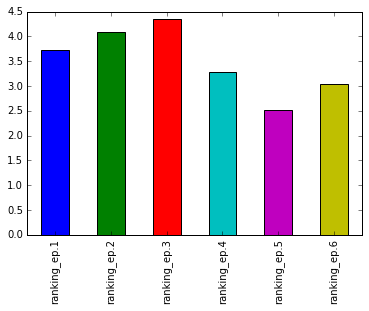

In [12]:
star_wars.iloc[:, 9:15].mean().plot.bar()

# Interpretation of the bar chart

* The rating scale is: lower numbers are better ratings

* This means that the original triology is more highly rated than the prequels
* ep. 5 is the highest rated movie.
* ep. 3 is the lowest.
* Of the original triology ep. 4 seems to be the least liked
* The prequels appear to be getting progressively worse

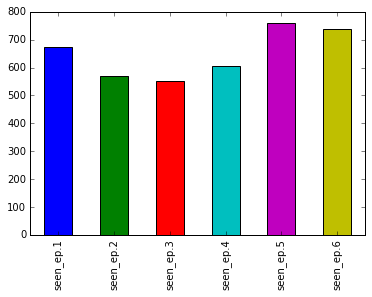

In [13]:
#find column names with 'seen' in the column title
col_nams_seen = star_wars.columns[star_wars.columns.str.contains('seen')].tolist()
star_wars[col_nams_seen[1:]].sum().plot.bar()

# Interpretation of bar chart

* The most commonly seen movies appear to be ep.5 and 6 
* These are followed by ep. 1. This implies, that a large part of the people taking this survey are in their 30s and 40s.

# Splitting Into Genders

In [14]:
print(star_wars['Gender'].value_counts(dropna = False))
gender_groups = star_wars.groupby('Gender')
males = gender_groups.get_group('Male')
females = gender_groups.get_group('Female')

Female    549
Male      497
NaN       140
Name: Gender, dtype: int64


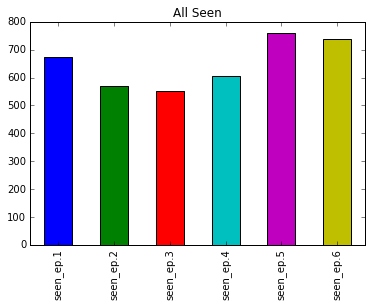

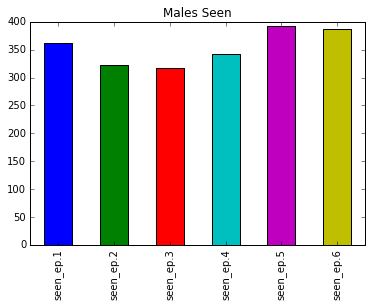

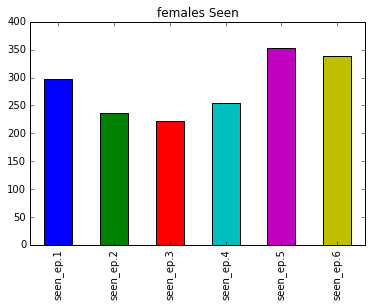

In [20]:
# Males seen
star_wars[col_nams_seen[1:]].sum().plot.bar(title = 'All Seen')
plt.show()

# Males seen
males[col_nams_seen[1:]].sum().plot.bar(title = 'Males Seen')
plt.show()


# Females Seen
females[col_nams_seen[1:]].sum().plot.bar(title = 'females Seen')
plt.show()


## Interpretation of the Gender Gap in the Movies Seen

* The Male population has a much smalle gap between movies seen. This implies people watching all of the movies instead of just some

* The female population has a much higher gap between the movies in ammount of seen films



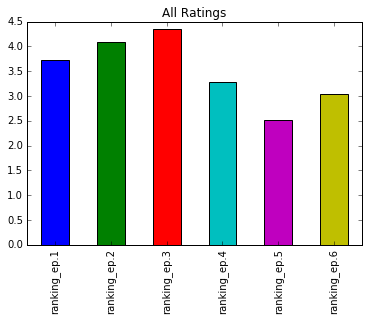

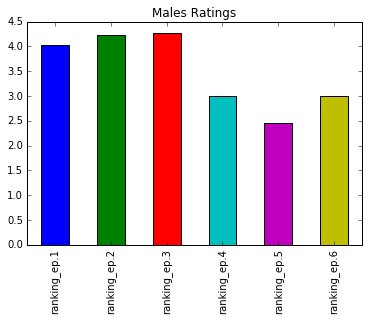

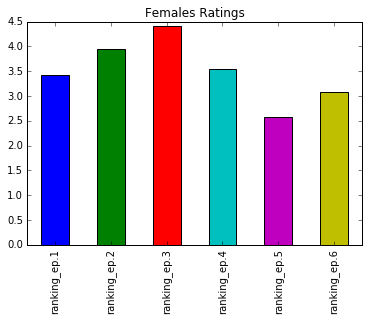

In [21]:
# All ratings
star_wars.iloc[:, 9:15].mean().plot.bar(title = 'All Ratings')
plt.show()


# Male Ratings
males.iloc[:, 9:15].mean().plot.bar(title = 'Males Ratings')
plt.show()

# Female Ratings
females.iloc[:, 9:15].mean().plot.bar(title = 'Females Ratings')
plt.show()

## Interpretation Gender Gap in Ratings

* The ratings are very similar between males and females.
* The female population seems to like ep. 4 more than the male population and think that the degradation in the quality of the prequels is stronger than the males.
* The male population appears to group all the prequels together, rating them very similarly.

* The difference in ratings might imply a difference in age demographic between the male and female population taking part in the survey, the females being older than the males

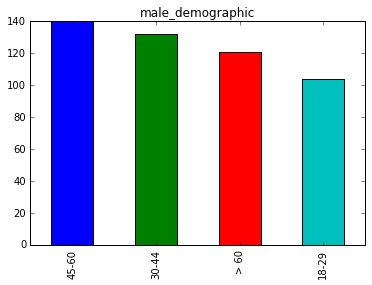

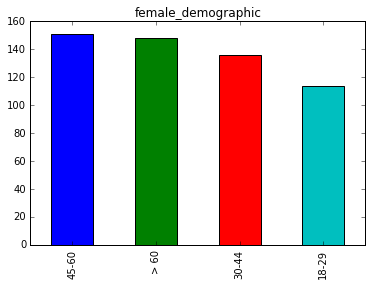

In [30]:
males['Age'].value_counts(dropna = False).plot.bar(title = 'male_demographic')
plt.show()
females['Age'].value_counts(dropna = False).plot.bar(title = 'female_demographic')
plt.show()


The hypothesis that female and male demographics are different is incorrect